In [1]:
import numpy as np, plottools as pl, healpy as hp, local, binning as bn, tools_qrec, curvedsky as cs, pickle, tools_cib, warnings
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [2]:
i = 1
aobj = local.init_analysis()
iobj = tools_cib.init_cib(wind='G40')

In [3]:
clII, clIk = np.loadtxt(iobj.fcII,unpack=True,usecols=(1,2))
iklm = hp.read_alm(aobj.flens['IN'][i])
iklm = cs.utils.lm_healpy2healpix(iklm,4096)[:iobj.lmax+1,:iobj.lmax+1]

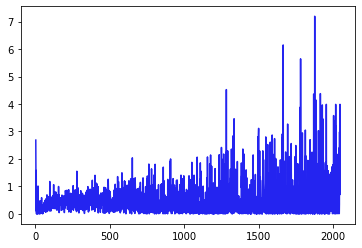

In [5]:
plot(clIk**2/clII/aobj.ckk)

(array([1664, 1781, 2016, 2017, 2018, 2021]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


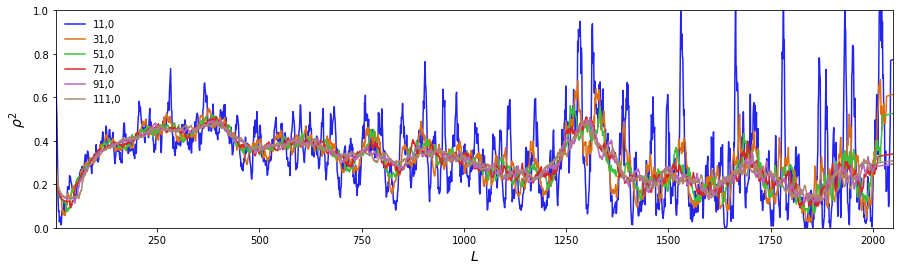

(array([   2, 1664, 1781, 2016, 2017, 2018, 2021, 2045, 2046, 2047, 2048]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


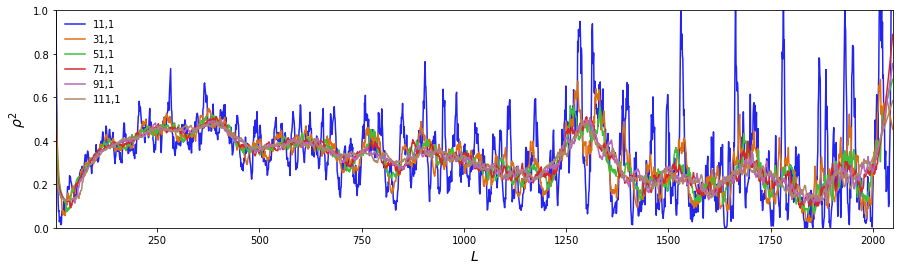

(array([   2,  906,  907, 1109, 1281, 1282, 1283, 1284, 1285, 1318, 1319,
       1401, 1402, 1403, 1497, 1498, 1528, 1529, 1530, 1531, 1532, 1662,
       1663, 1664, 1665, 1666, 1667, 1779, 1780, 1781, 1782, 1783, 1784,
       1868, 1869, 1870, 1871, 1872, 1885, 1886, 1887, 1905, 1930, 1931,
       1932, 1933, 1934, 1935, 1952, 1953, 2003, 2016, 2018, 2019, 2020,
       2021, 2022, 2046, 2047, 2048]),)
(array([], dtype=int64),)
(array([   2, 2020, 2022, 2023, 2045, 2046, 2047, 2048]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([26, 27, 29]),)
(array([], dtype=int64),)
(array([35, 36, 37, 38, 39]),)
(array([], dtype=int64),)
(array([43, 44, 45, 46, 47, 48, 49]),)
(array([52, 58, 59]),)
(array([53, 54, 55, 56, 57]),)


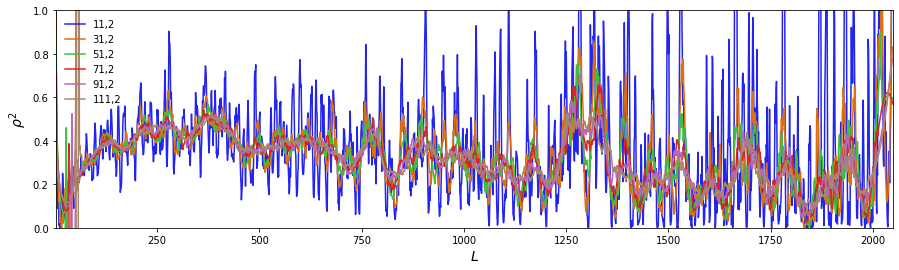

(array([   2,    3,  906,  907, 1109, 1281, 1282, 1283, 1284, 1285, 1318,
       1319, 1401, 1402, 1403, 1497, 1498, 1528, 1529, 1530, 1531, 1532,
       1662, 1663, 1664, 1665, 1666, 1667, 1779, 1780, 1781, 1782, 1783,
       1784, 1868, 1869, 1870, 1871, 1872, 1885, 1886, 1887, 1905, 1930,
       1931, 1932, 1933, 1934, 1935, 1952, 1953, 2003, 2016, 2018, 2019,
       2020, 2021, 2022, 2046, 2047, 2048]),)
(array([], dtype=int64),)
(array([   2, 2020, 2022, 2023, 2045, 2046, 2047, 2048]),)
(array([], dtype=int64),)
(array([   2, 2046, 2047, 2048]),)
(array([26, 27, 29]),)
(array([], dtype=int64),)
(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),)
(array([], dtype=int64),)
(array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49]),)
(array([58, 59]),)
(array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57]),)


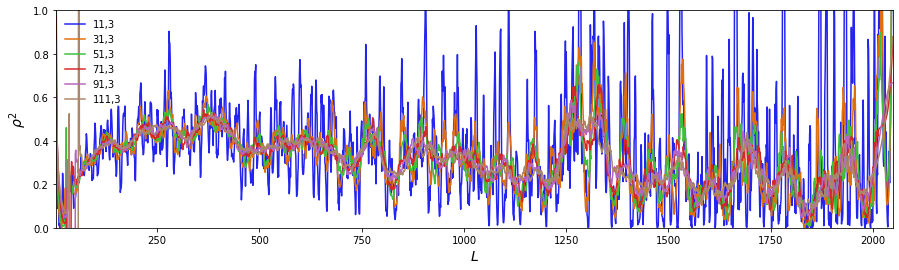

In [6]:
for polyn in [0,1,2,3]:
    pl.plot_1dstyle(fsize=[15,4],xmin=2,xmax=2048,ymin=0,ymax=1,ylab=r'$\rho^2$')
    for windowl in [11,31,51,71,91,111]:
        clIIs = savgol_filter( clII, windowl, polyn)
        clIks = savgol_filter( clIk, windowl, polyn)
        rho = clIks**2/clIIs/aobj.ckk
        rho[:2] = 0.
        print(np.where(rho>1.))
        print(np.where(rho<0.))
        plot(rho,label=str(windowl)+','+str(polyn))
    legend()
    show()

In [7]:
clIIs = savgol_filter( clII, 91, 0)
clIks = savgol_filter( clIk, 91, 0)
__, Ialm = cs.utils.gauss2alm_const(iobj.lmax,aobj.ckk,clIIs,clIks,iklm)

In [8]:
IK = cs.utils.alm2cl(iobj.lmax,Ialm,iklm)

In [11]:
mb = bn.multipole_binning(20,lmin=1,lmax=2048)
#ClII = interp1d(mb.bc, bn.binning(clII,mb), kind='cubic')
#ClIk = interp1d(mb.bc, bn.binning(clIk,mb), kind='cubic')

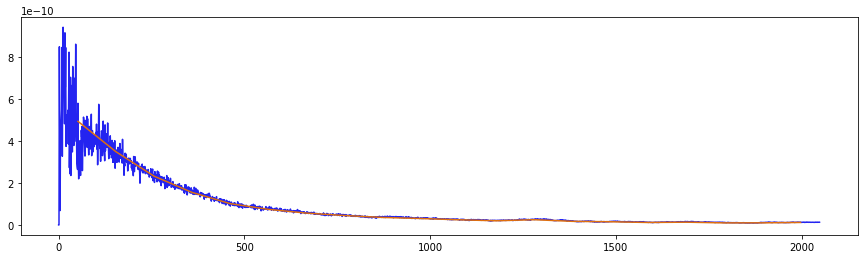

In [12]:
plot(IK)
plot(mb.bc,bn.binning(clIk,mb))